<a href="https://colab.research.google.com/github/vijaythapakdata/AutomobileDataEda/blob/main/AutomobileEda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dependecies

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set()

Load Dataset

In [ ]:
mydata_auto=pd.read_csv("/content/Automobile_data.csv")

Print first 5 rows and last 5 rows

In [ ]:
mydata_auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
#print last 5 rows
mydata_auto.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [ ]:
#check the shape of datasets
mydata_auto.shape

(205, 26)

In [ ]:
#check number of columns
mydata_auto.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
mydata_auto.value_counts()

symboling  normalized-losses  make           fuel-type  aspiration  num-of-doors  body-style   drive-wheels  engine-location  wheel-base  length  width  height  curb-weight  engine-type  num-of-cylinders  engine-size  fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg  price
 3         ?                  volkswagen     gas        std         two           convertible  fwd           front            94.5        159.3   64.2   55.6    2254         ohc          four              109          mpfi         3.19  3.4     8.5                90          5500      24        29           11595    1
 0         89                 subaru         gas        std         four          wagon        fwd           front            97.0        173.5   65.4   53.0    2455         ohcf         four              108          mpfi         3.62  2.64    9.0                94          5200      25        31           10198    1
           ?                  audi           

In [ ]:
mydata_auto.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Data cleaning

In [ ]:
#check for null values
mydata_auto.isnull().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

Although there is no missing value in our dataset however we have non numeric values and non string values so we need to figure out all those

# Find out number of records having '?' value for normalized losses

In [ ]:
mydata_auto["normalized-losses"].loc[mydata_auto["normalized-losses"]=="?"].count()

41

# Setting the missing value to mean of normalized losses and conver the datatype to integer

In [ ]:
nl=mydata_auto["normalized-losses"].loc[mydata_auto["normalized-losses"]!="?"]
nlmean = nl.astype(str).astype(int).mean()
mydata_auto["normalized-losses"]=mydata_auto["normalized-losses"].replace("?",nlmean).astype(int)
mydata_auto["normalized-losses"].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int64

Cleaning price

In [ ]:
# Find out the number of values which are not numeric
mydata_auto["price"].str.isnumeric().value_counts()

True     201
False      4
Name: price, dtype: int64

In [ ]:
# List out the values which are not numeric
mydata_auto["price"].loc[mydata_auto["price"].str.isnumeric()==False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [ ]:
p=mydata_auto["price"].loc[mydata_auto["price"]!="?"]
pmean=p.astype(str).astype(int).mean()
mydata_auto["price"]=mydata_auto["price"].replace("?",pmean).astype(int)
mydata_auto["price"].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

In [ ]:
# Checking the numberic and replacing with mean value and conver the datatype to integer
mydata_auto["horsepower"].str.isnumeric().value_counts()

True     203
False      2
Name: horsepower, dtype: int64

In [ ]:
mydata_auto["horsepower"].loc[mydata_auto["horsepower"].str.isnumeric()==False]

130    ?
131    ?
Name: horsepower, dtype: object

In [ ]:
hp=mydata_auto["horsepower"].loc[mydata_auto["horsepower"]!="?"]
hpmean=hp.astype(str).astype(int).mean()
mydata_auto["horsepower"]=mydata_auto["horsepower"].replace("?",hpmean).astype(int)

In [ ]:
#check outliers
mydata_auto.loc[mydata_auto["horsepower"]>10000]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [ ]:
#check number of doors
mydata_auto["num-of-doors"].loc[mydata_auto["num-of-doors"]=="?"]

27    ?
63    ?
Name: num-of-doors, dtype: object

In [ ]:
mydata_auto=mydata_auto[mydata_auto["num-of-doors"]!="?"]

In [ ]:
mydata_auto["num-of-doors"].loc[mydata_auto["num-of-doors"]=="?"]

Series([], Name: num-of-doors, dtype: object)

In [ ]:
#count vehicle make
mydata_auto["make"].value_counts()

toyota           32
nissan           18
mazda            16
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
bmw               8
dodge             8
mercedes-benz     8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

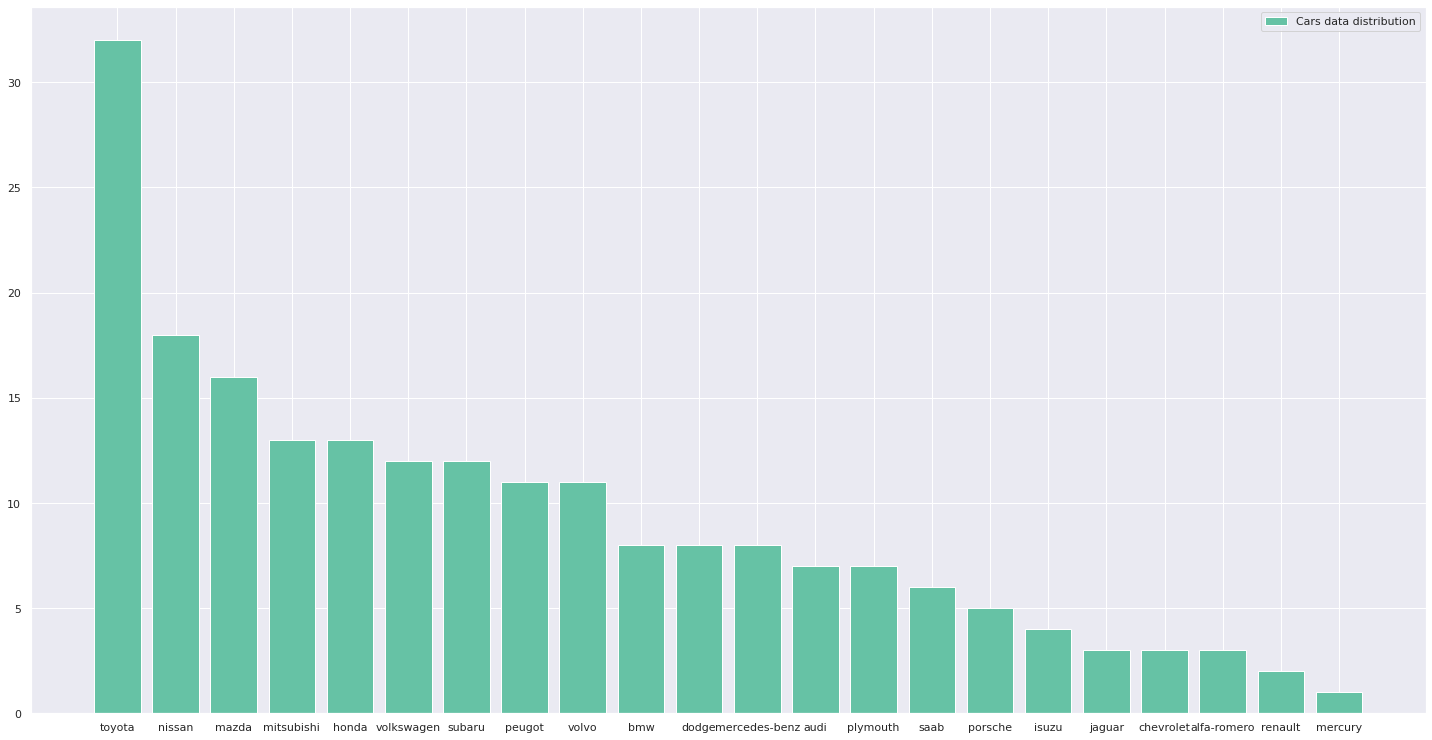

In [ ]:
#analyis the data of cars 
plt.figure(figsize=(25,13))
sns.set_palette("Set2")
plt.bar(list(mydata_auto["make"].value_counts().keys()),list(mydata_auto["make"].value_counts()),label="Cars data distribution")
plt.legend()
plt.show()

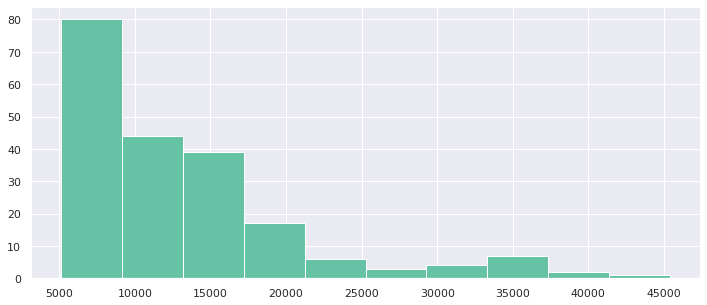

In [ ]:
#price distibution
plt.figure(figsize=(12,5))
plt.hist(mydata_auto["price"])
plt.show()

In [ ]:
#count fuel type
mydata_auto["fuel-type"].value_counts()

gas       184
diesel     19
Name: fuel-type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


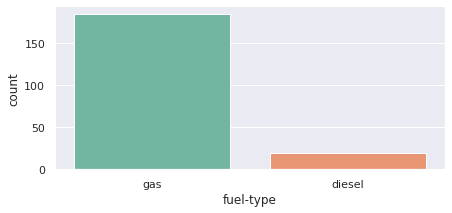

In [ ]:
plt.figure(figsize=(7,3))
sns.set_style("darkgrid")
sns.set_palette("Set2")
sns.countplot("fuel-type",data=mydata_auto)
plt.show()

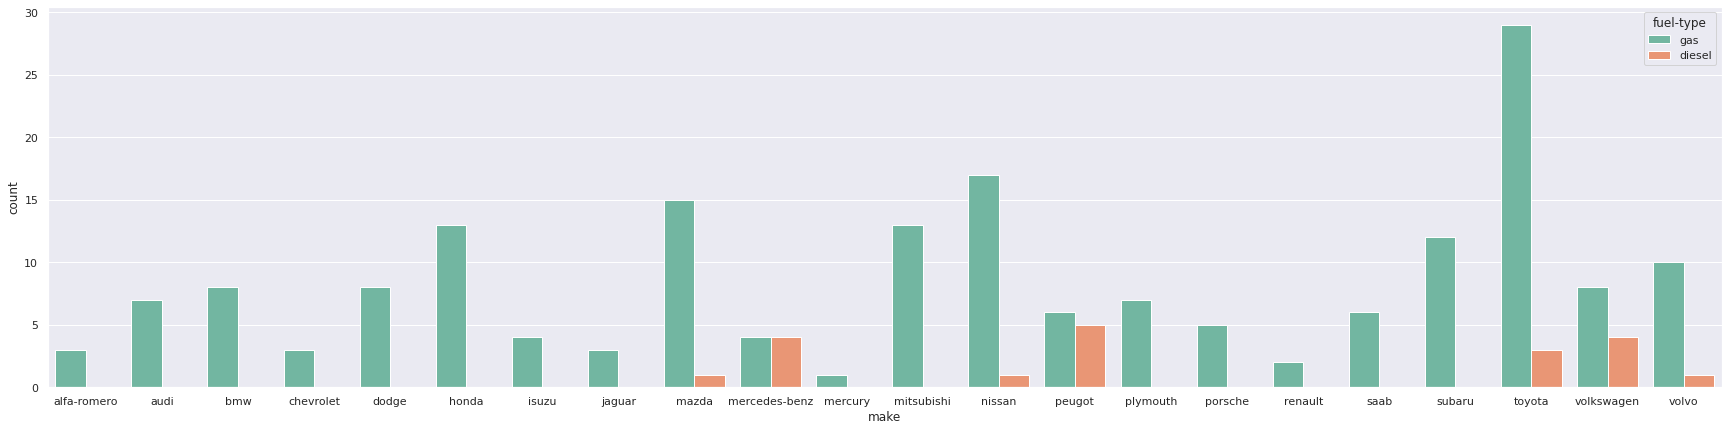

In [ ]:
#vehicle w.r.t to fuel type
plt.figure(figsize=(30,7))
sns.set_style("darkgrid")
sns.set_palette("Set2")
sns.countplot(x="make",data=mydata_auto,hue="fuel-type")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


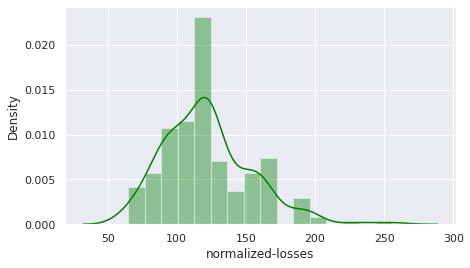

In [ ]:
plt.figure(figsize=(7,4))
sns.distplot(mydata_auto["normalized-losses"],color="green", kde=True, hist=True)
plt.show()

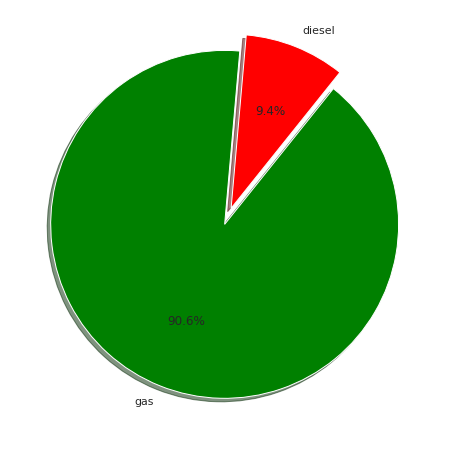

In [ ]:
#draw pie chart for fuel-type
plt.figure(figsize=(12,8))
explodes=[0,0.1]
color=["green","red"]
plt.pie(list(mydata_auto["fuel-type"].value_counts()),labels=list(mydata_auto["fuel-type"].value_counts().keys()),explode=explodes,colors=color,autopct="%.1f%%",startangle=85,shadow=True)
plt.show()

In [ ]:
#count number of doors vehicles
mydata_auto["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

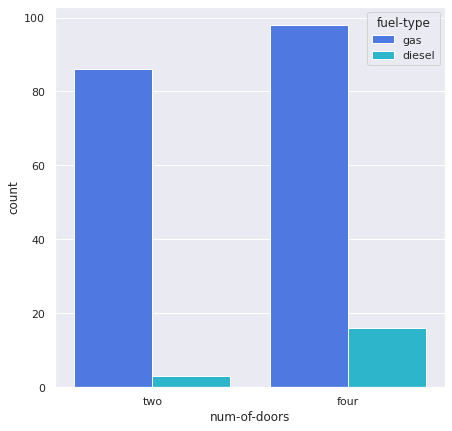

In [ ]:
#check number of doors w.r.t fuel
plt.figure(figsize=(7,7))
sns.set_palette("rainbow")
sns.countplot(x="num-of-doors",hue="fuel-type",data=mydata_auto)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


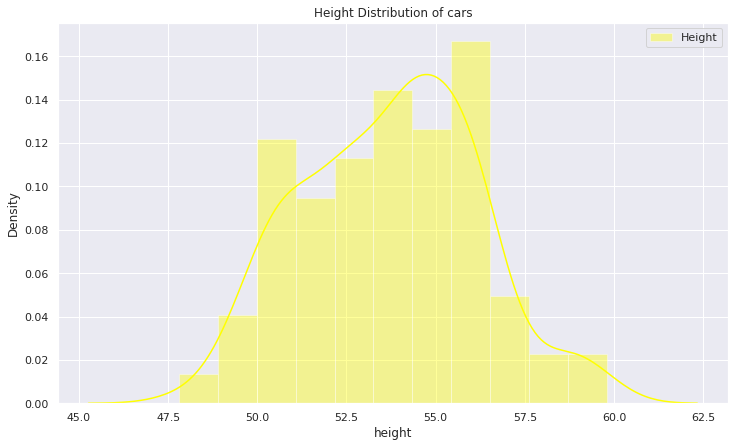

In [ ]:
#top 10 longest car
plt.figure(figsize=(12,7))
sns.distplot(mydata_auto["height"],kde=True,hist=True,color="yellow",label="Height")
plt.title("Height Distribution of cars")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


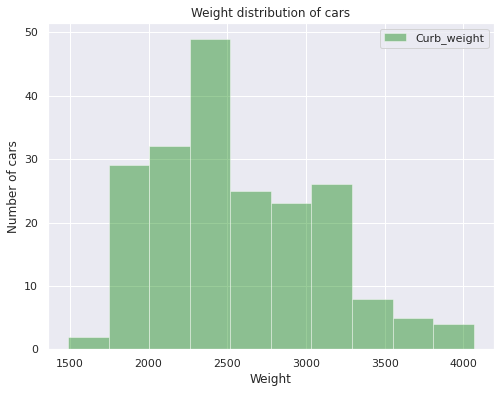

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(mydata_auto["curb-weight"],color="green",kde=False,hist=True,label="Curb_weight")
plt.xlabel("Weight")
plt.title("Weight distribution of cars")
plt.ylabel("Number of cars")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


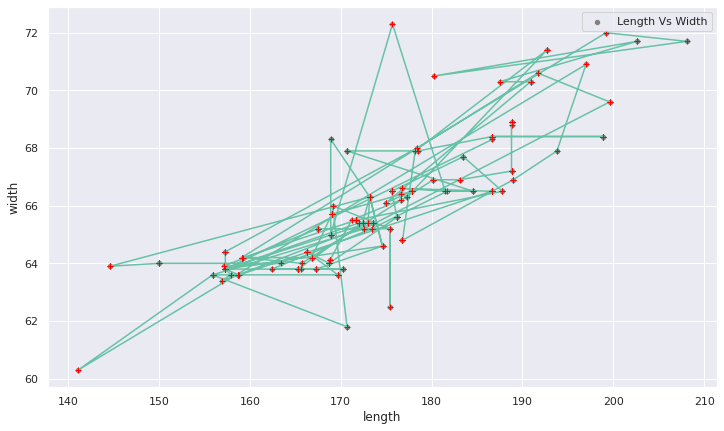

In [ ]:
plt.figure(figsize=(12,7))
sns.set_palette("Set2")
sns.scatterplot(mydata_auto["length"],mydata_auto["width"],label="Length Vs Width",color="grey")
plt.plot(mydata_auto["length"],mydata_auto["width"],marker="+",mec="red")
plt.legend()
plt.show()

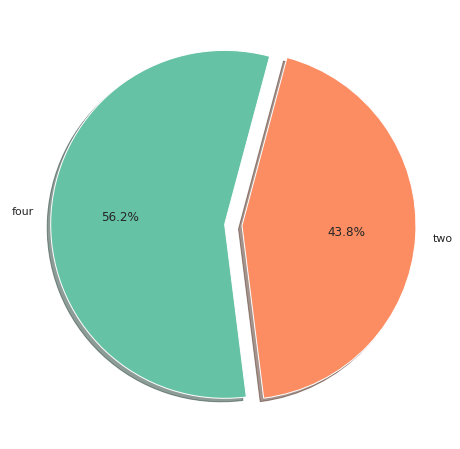

In [ ]:
#plot piechart for num-of-doors
plt.figure(figsize=(8,8))
explodes=[0,0.1]
plt.pie(list(mydata_auto["num-of-doors"].value_counts()),labels=list(mydata_auto["num-of-doors"].value_counts().keys()),autopct="%.1f%%",shadow=True,startangle=75,explode=explodes)
plt.show()

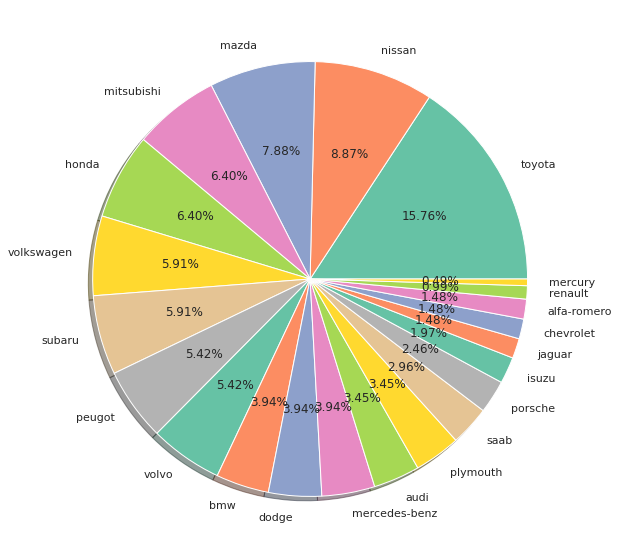

In [ ]:
#plot pie for make
plt.figure(figsize=(15,10))
plt.pie(list(mydata_auto["make"].value_counts()),labels=list(mydata_auto["make"].value_counts().keys()),shadow=True,autopct="%.2f%%")
plt.show()

In [ ]:
#count engine location
mydata_auto["engine-location"].value_counts()

front    200
rear       3
Name: engine-location, dtype: int64

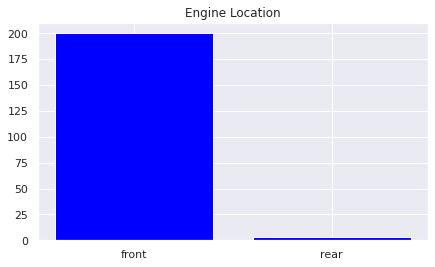

In [ ]:
plt.figure(figsize=(7,4))
plt.title("Engine Location")
plt.bar(list(mydata_auto["engine-location"].value_counts().keys()),list(mydata_auto["engine-location"].value_counts()),color="blue")
plt.show()

In [ ]:
#body style
mydata_auto["body-style"].value_counts()

sedan          94
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

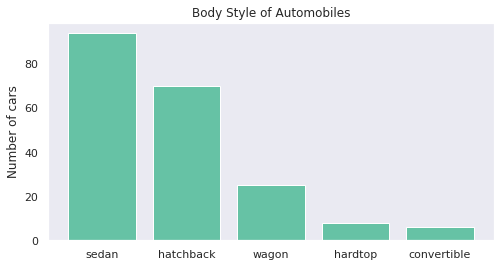

In [ ]:
plt.figure(figsize=(8,4))
plt.title("Body Style of Automobiles")
plt.ylabel("Number of cars")
plt.grid(False)
plt.bar(list(mydata_auto["body-style"].value_counts().keys()),list(mydata_auto["body-style"].value_counts()))
plt.show()

In [ ]:
#count of number of cylinder cars
mydata_auto["num-of-cylinders"].value_counts()

four      157
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

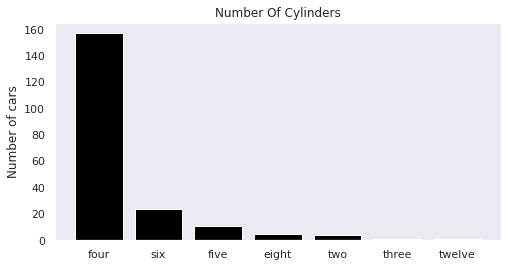

In [ ]:
plt.figure(figsize=(8,4))
plt.title("Number Of Cylinders")
plt.ylabel("Number of cars")
plt.grid(False)
plt.bar(list(mydata_auto["num-of-cylinders"].value_counts().keys()),list(mydata_auto["num-of-cylinders"].value_counts()),color="black")
plt.show()

In [ ]:
#top 10 horse power car
mydata_auto["horsepower"].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
88      6
114     6
101     6
160     6
62      6
76      5
145     5
82      5
84      5
97      5
111     4
86      4
102     4
123     4
92      4
207     3
90      3
121     3
152     3
73      3
182     3
85      3
100     2
94      2
56      2
52      2
104     2
156     2
112     2
184     2
176     2
162     2
155     2
161     2
200     1
288     1
48      1
55      1
58      1
60      1
175     1
72      1
106     1
154     1
78      1
143     1
142     1
140     1
135     1
134     1
120     1
115     1
262     1
Name: horsepower, dtype: int64

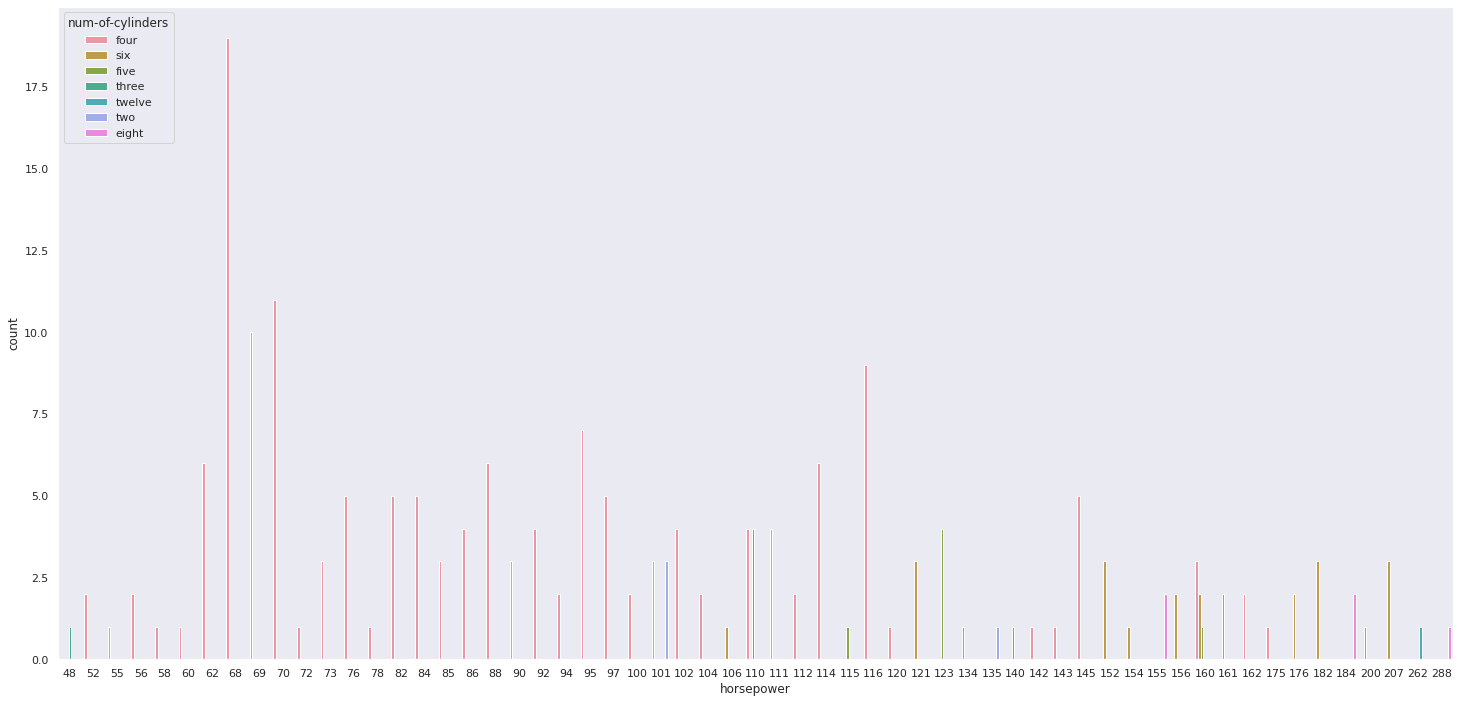

In [ ]:
plt.figure(figsize=(25,12))
sns.set_palette("rainbow")
plt.grid(False)
sns.countplot(x="horsepower",data=mydata_auto,hue="num-of-cylinders")
plt.show()

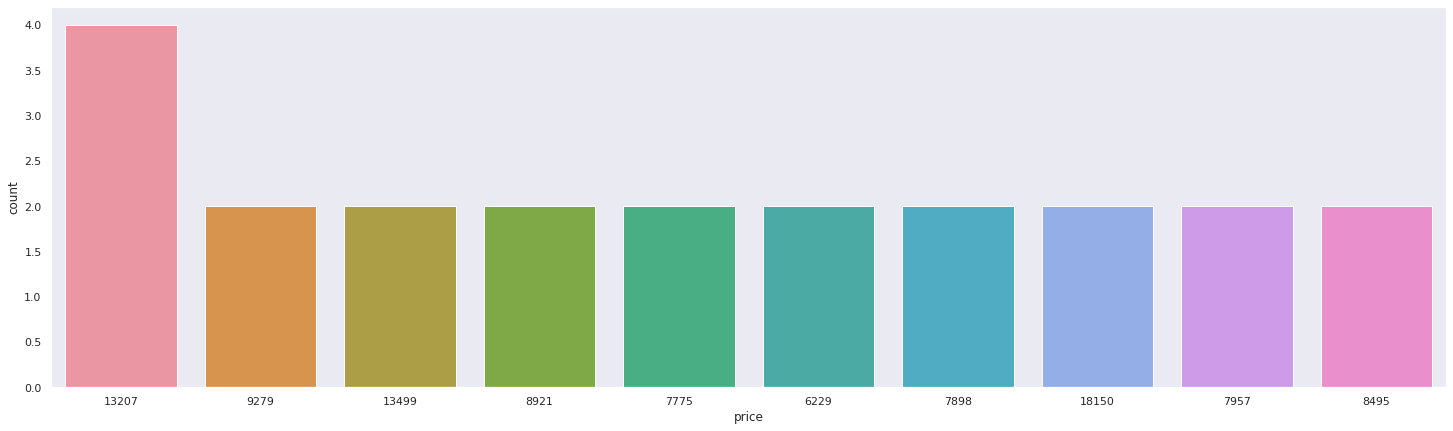

In [ ]:
#compare the top 10 w.r.t make
plt.figure(figsize=(25,7))
plt.grid(False)
sns.countplot(x="price",data=mydata_auto,order=mydata_auto["price"].value_counts().index[:10])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


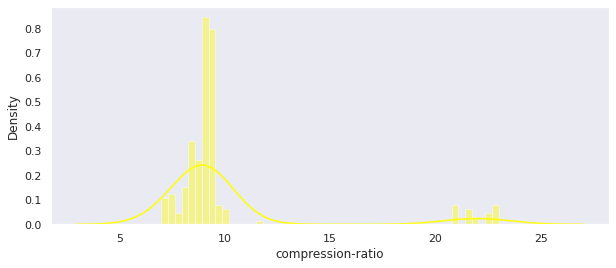

In [ ]:
plt.figure(figsize=(10,4))
plt.grid(False)
sns.distplot(mydata_auto["compression-ratio"],kde=True,hist=True,color="yellow")
plt.show()

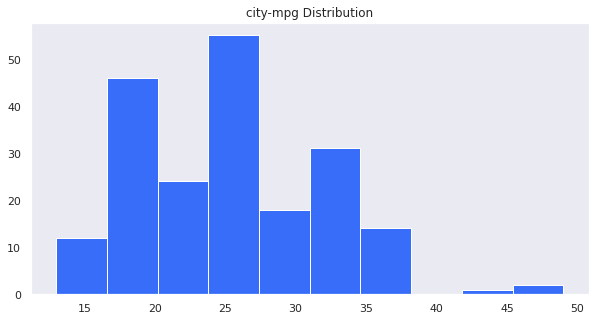

In [ ]:
plt.figure(figsize=(10,5))
plt.grid(False)
plt.title("city-mpg Distribution")
plt.hist(mydata_auto["city-mpg"])
plt.show()

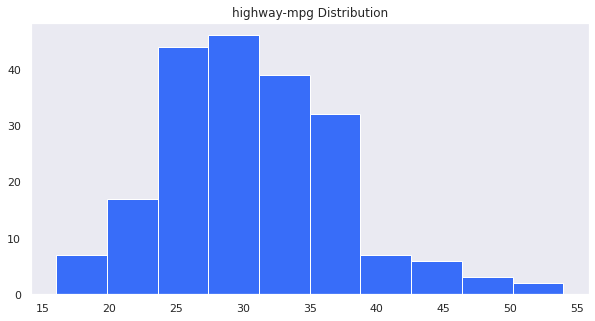

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(mydata_auto["highway-mpg"])
plt.title("highway-mpg Distribution")
plt.grid(False)
plt.show()

Check Statstics 

In [ ]:
mydata_auto.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
count,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,0.837438,121.871921,98.781281,174.11330,65.915271,53.731527,2557.916256,127.073892,10.093202,104.463054,25.172414,30.699507,13241.911330
std,1.250021,31.784599,6.040994,12.33909,2.150274,2.442526,522.557049,41.797123,3.888216,39.612384,6.529812,6.874645,7898.957924
min,-2.000000,65.000000,86.600000,141.10000,60.300000,47.800000,1488.000000,61.000000,7.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.55000,64.100000,52.000000,2145.000000,97.000000,8.600000,70.000000,19.000000,25.000000,7781.500000
50%,1.000000,122.000000,97.000000,173.20000,65.500000,54.100000,2414.000000,120.000000,9.000000,95.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.30000,66.900000,55.500000,2943.500000,143.000000,9.400000,116.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.10000,72.300000,59.800000,4066.000000,326.000000,23.000000,288.000000,49.000000,54.000000,45400.000000


check Correlation
1->Positive correlation
2->Negative correlation

In [ ]:
correlation=mydata_auto.corr()

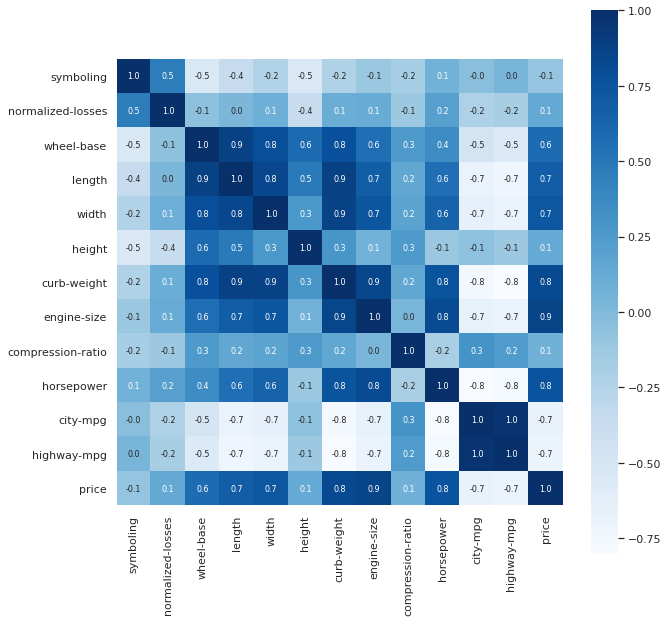

In [ ]:
#plot heat map
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, annot=True, annot_kws={"size":8}, fmt=".1f", cmap="Blues")
plt.show()

# New Section